#데이터 시각화 분석
##1. 단일 범주형 / 연속형 분석
> 범주형은 분석하고자 하는 가지 수가 적은 경우 사용되며 연속형은 시간의 흐름과 같이 연속된 데이터 구조를 갖는 경우 사용된다.
###1.1 범주형
> 범주형은 다음과 같은 내용을 분석할 수 있다.
* 생존여부
* 남녀의 성비
* 좌석 등급별 성비
* 출발 항구별 비율

In [1]:
import pandas as pd

df = pd.read_csv('data/titanic_cleaning.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


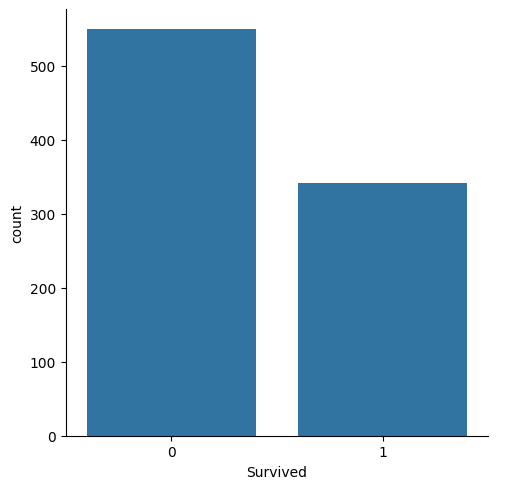

In [2]:
import seaborn as sns

sns.catplot(x='Survived', kind='count', data=df)

> 1이 생존된 상황으로 대략 300명 가량이 생존된 것을 알 수 있다.

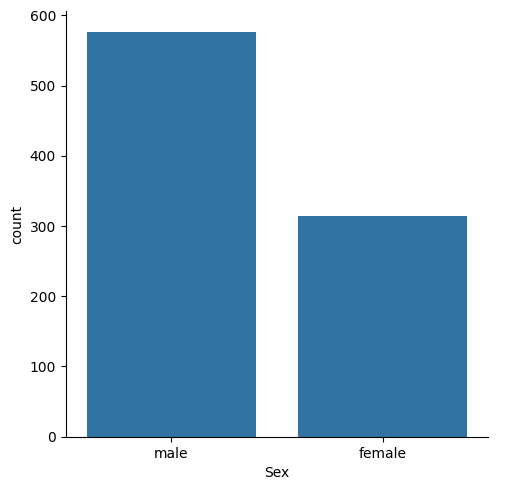

In [3]:
sns.catplot(x='Sex', kind='count',data=df)

>catplot은 여러 차트를 표현할 때 사용한다. kind를 통해 그리고자 하는 종류의 그래프를 그릴 수 있다.자세한 사항은 다음 사이트를 참조하기 바란다.
* https://seaborn.pydata.org/generated/seaborn.catplot.html

> 여기서는 막대 그래프를 표현한다. 첫 번째 들어갈 인자는 막대로 표현할 데이터이고 두 번째 kind를 차트의 모양을 의미한다. 세 번째 data는 참조할 DataFrame을 의미한다.

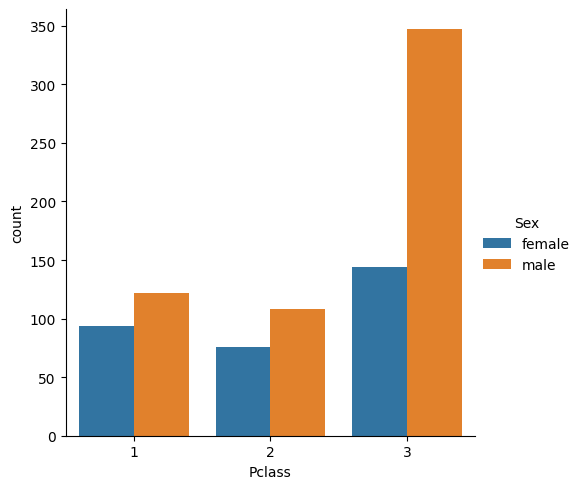

In [4]:
sns.catplot(x='Pclass', kind='count', hue='Sex', data=df)

> hue 옵션은 기존의 분류된 내용을 조금 더 자세하게 분류해서 보여준다. 위의 차트를 보면 우선 객실 등급으로 나누고 그 등급을 다시 성별로 나누어 분석한 내용이다.

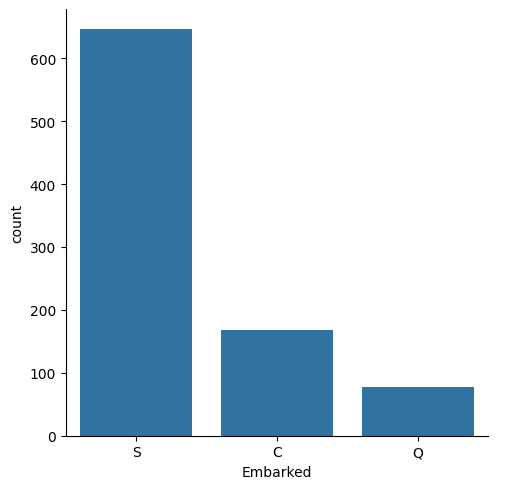

In [6]:
sns.catplot(x='Embarked', kind='count', data=df)

> 위의 네 가지 차트로 확인할 수 있는 것은 생존율이 대략 30%정도이며 탑슺자의 남자 비율이 월등히 높다. 특히 3등석의 비율이 월등히 높은 것을 알 수 있다. 타이타닉 호는 영국에서 출발해 미국으로 운행하는 배로서 당시 아메리칸 드림을 꿈꾸며 이동하던 남자들이 많았다는 것을 단편적으로 알 수 있다.

> 또한 s항구에서 가장 많은 탑승자가 나온것을 알 수 있다. s 항구는 사우샘프턴 이라는 항구 도시로써 석기 시대부터 사람이 거주했다고 전해 지며 우리나라의 부산과 같이 남쪽에 위치한다. 이렇듯 항구 도시이다 보니 많은 인원이 탓을 듯 하다.

>c항구는 사우샘프턴에서 출발해 첫 번째 경유지인 현재는 프랑스령인 셰르부르(Cherbourg) 항구이다. 경유지 이다보니 적은 인원이 탑승한 것이다.

>Q항구는 두 번째 경유지인 퀸즈타운(Queenstown)으로 빅토리아 여왕이 방문하여 이름이 변경되었다가 현재는 코브(cobh)로 불리고 있다.

###1.2 연속형
> 연속형은 다음과 같은 내용으로 분석할 수 있다.
* 나이 분포
* 요금 분포

<Axes: >

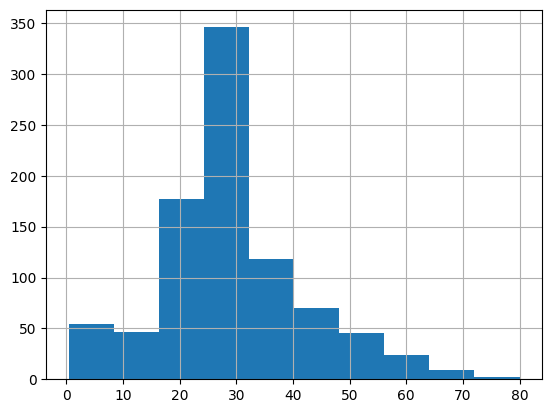

In [7]:
df['Age'].hist()

>hist 역시 막대 차트로 표현되며 위 차트에서 20대 인원이 많은 것으로 보아 아메리칸 드림을 꿈꾸며 승선한 사람들이 많은 것을 유추할 수 있다.

<Axes: >

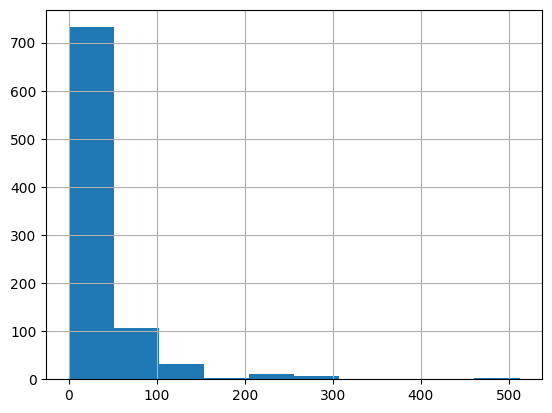

In [8]:
df['Fare'].hist()

>요금은 대략 0에서 50정도가 가장 많은 것으로 보아 초대장으로 3등석 인원이 많은 것을 유추할 수 있다.

##2. 범주형 x 범주형
> 두 가지 범주형으로 다음과 같은 사항을 분석할 수 있다.
* 성별 생존자
* 개실 등급 별 생존자
* 탑승 항구별 생존자

###2.1 성별 생존자

>기존에 생존 유무를 0과 1로 표현되어 보기가 어려웠다. 이를 수정하기 위해 map을 이용하여 0인 경우 사망을 의미하는 'No'를 1인 경우 생존을 의미하는 'Yes'를 지정하여 차트로 표현할 수 있다.

> 위의 차트에서는 생존자 중 여성의 비율이 높다. 이는 당시 약자를 증시하는 것이 높았고 남성 보다는 여성이 먼저 구조된 것을 볼 수 있다.

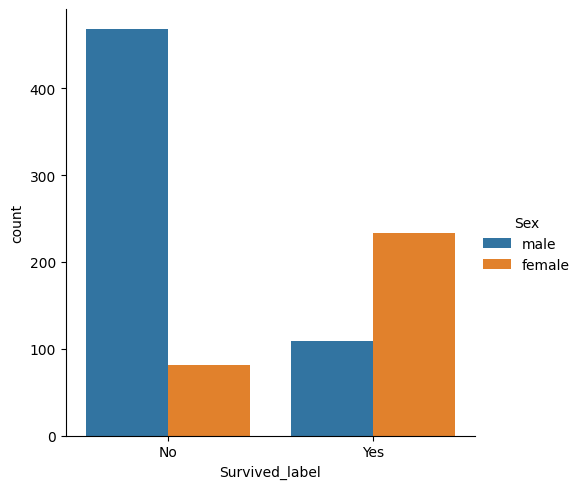

In [9]:
df['Survived_label'] = df['Survived'].map({0: 'No', 1: 'Yes'})
sns.catplot(x='Survived_label', kind='count', hue='Sex',data=df)

###2.2 객실별 생존자

>차트에 한글을 표현하기 위해서는 한글 글꼴이 필요하다. 다음과 같은 방법으로 한글 글꼴을 설치할 수 있다.

In [19]:
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

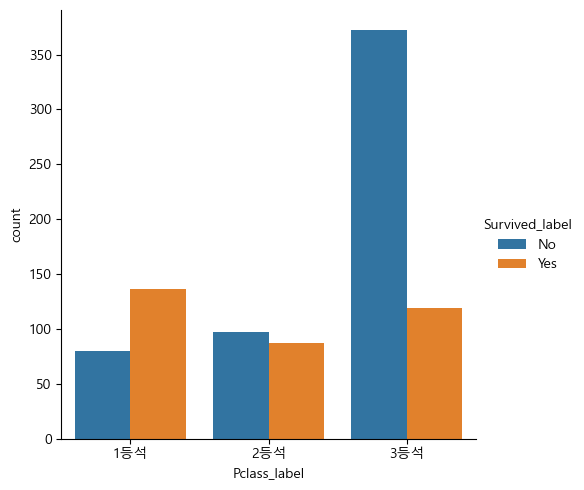

In [20]:
df['Pclass_label'] = df['Pclass'].map({1: '1등석', 2: '2등석', 3: '3등석'})
sns.catplot(x='Pclass_label', kind='count', hue='Survived_label', data=df, order=['1등석', '2등석', '3등석'])

> 한글 설치가 완료되었으면 plt를 이용하여 글꼴을 적용할 수 있다. plt의 rcParams를 이용하여 font.family 속성에 설치한 글꼴을 적용한다. 

>이전과 마찬가지로 개실 등급을 한글로 표현했다. catplot에서 데이터 출력 시 정렬이 안되게 나타나서 정렬을 위해 order를 이용했다.

> 생존률의 차이는 1등석부터 3등석 순으로 낮아지는 것을 볼 수 있다.

###2.3 항구별 생존자

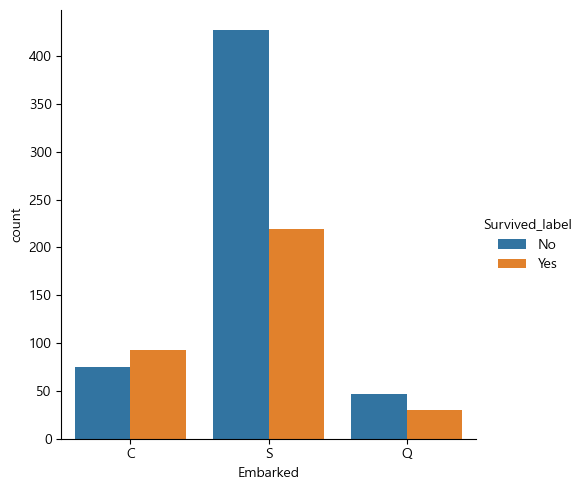

In [21]:
sns.catplot(x='Embarked', kind='count', hue='Survived_label', order=['C', 'S', 'Q'], data=df)

> 항구에 따른 생존율을 확인해 본 결과 C항구에서 승선한 사람의 생존율이 높은 것을 볼 수 있다.

### 2.4 20대 미만의 생존자

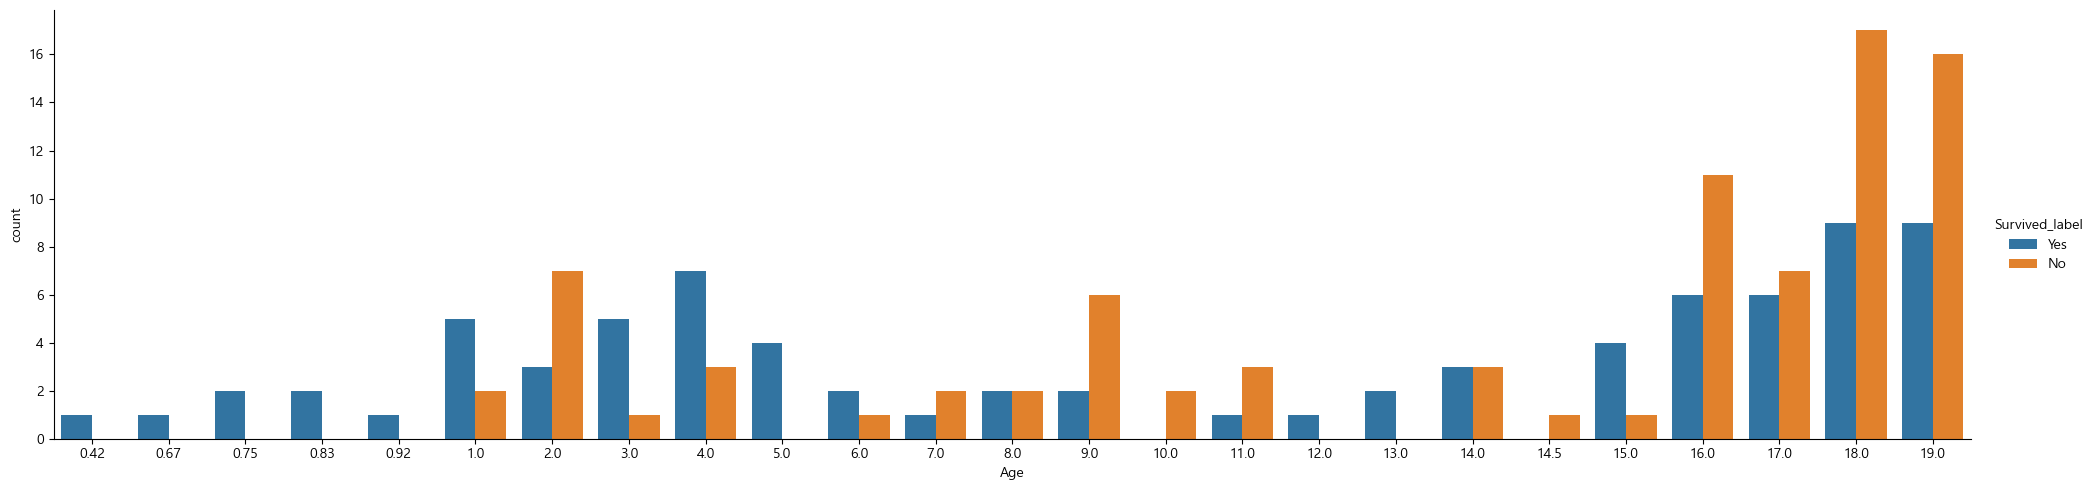

In [22]:
sns.catplot(x='Age', kind='count', hue='Survived_label', data=df.loc[df['Age'] < 20], aspect=4)

>20세 미안의 사람에 대한 생존률을 확인해 보았다. 코드에서 df.loc를 이용하였는데 loc는 생략 가능하다. 

> 결과를 확인해 보면 어릴 수록 생존률이 높은 것을 볼 수 있다.

###2.5 60대 이상의 생존자

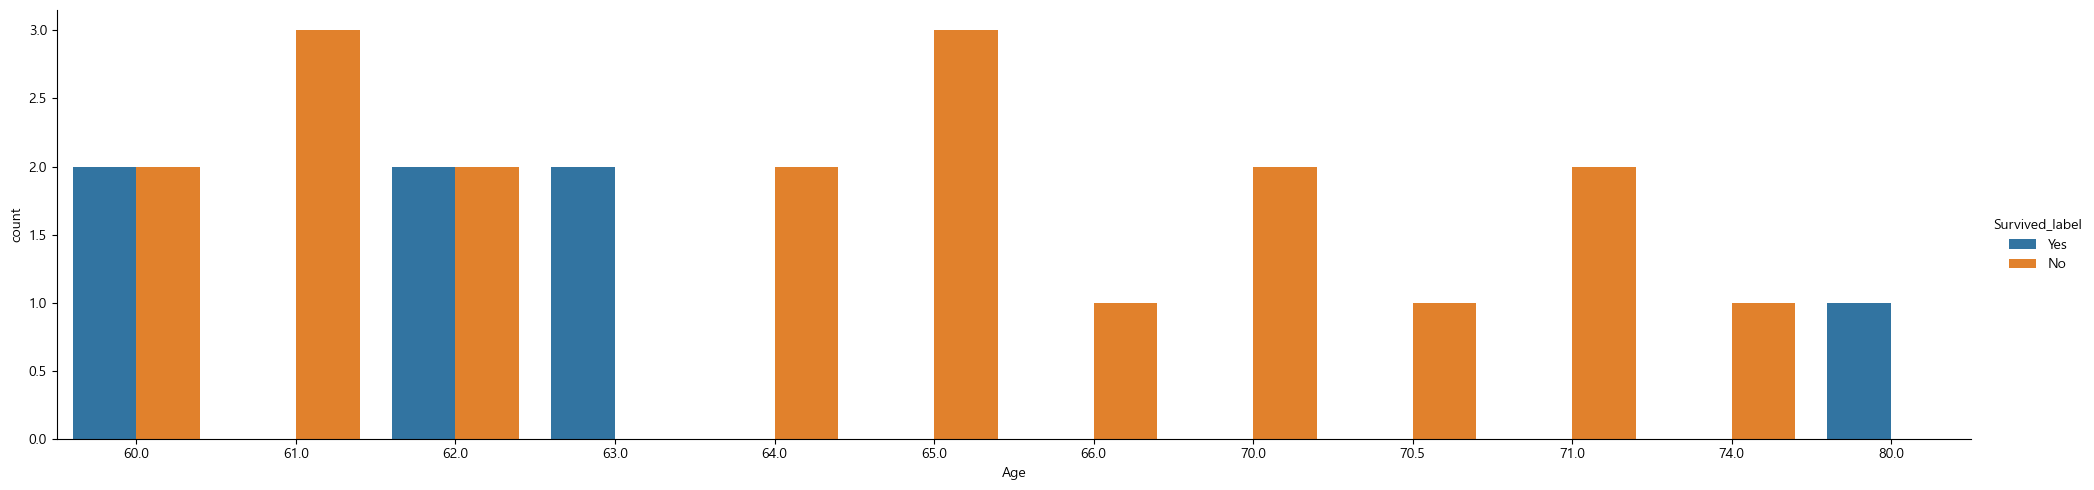

In [23]:
sns.catplot(x='Age', kind='count', hue='Survived_label', data=df.loc[(df['Age'] >= 60)], aspect=4)

>60세 이상의 사람에 대한 생존률 확인 결과 사망자가 더 많은 것을 볼 수 있다.

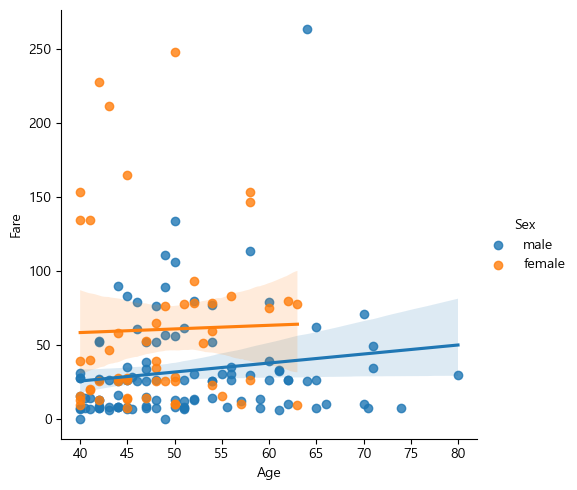

In [28]:
sns.lmplot(x='Age', y='Fare', hue='Sex', data=df[df['Age'] >= 40])

>lmplot은 추후 회귀 분석에서 사용된다. 각 선에 근접한 데이터는 같은 결과를 갖는다는 의미이다. 자세한 사항은 회귀분석을 학습하면서 이야기 하도록 하겠다.

>생존자와 사망자의 성별을 보면 여성은 모두 살았으며 남성은 1명을 제외하고 모두 죽었다. 이것으로 알 수 있는 것은 노인의 생존률은 나이가 아닌 성별이라는 것을 알 수 있다.

> 같은 방법으로 20 ~ 59사이도 알아보자

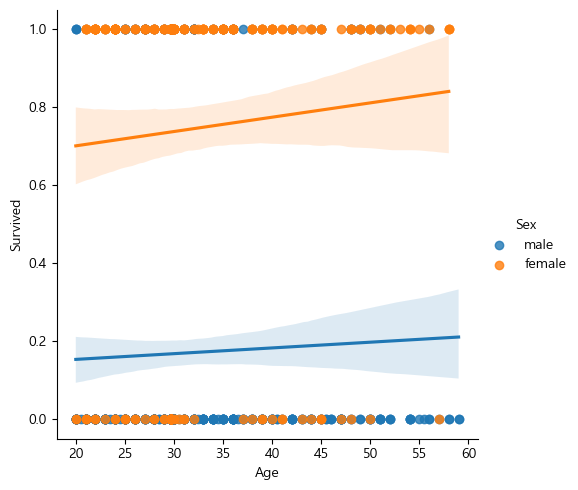

In [29]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=df[(df['Age'] >= 20)&(df['Age'] < 60)])


> 20 ~ 59 사이의 사람도 나이보다는 성별이 우선시 된것을 알 수 있다. 

###2.6 다양한 표현

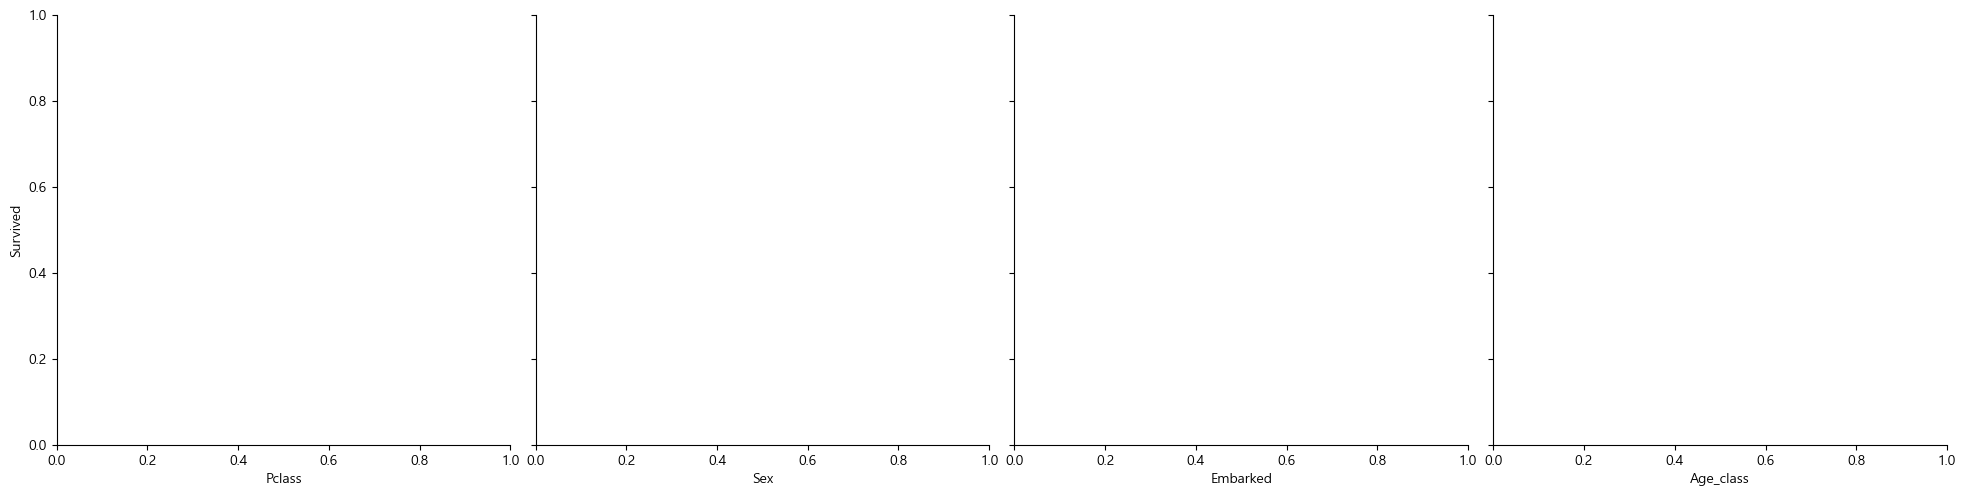

In [37]:
bins = [0, 20, 60, 100]
df['Age_class'] = pd.cut(df['Age'], bins=bins, labels=['미성년', '성년', '노년'])
pg = sns.PairGrid(df, y_vars='Survived', x_vars=['Pclass', 'Sex', 'Embarked', 'Age_class'], height=5, aspect=1)

>PairGrid는 여러 개의 차트를 표현할 경우 사용된다. 첫 번째 인자는 사용할 데이터, y_vars는 y 데이터 x_vars는 x데이터(여기서는 다양한 데이터 적용),height는 차트 높이, aspect는 x축 길이를 의미한다.

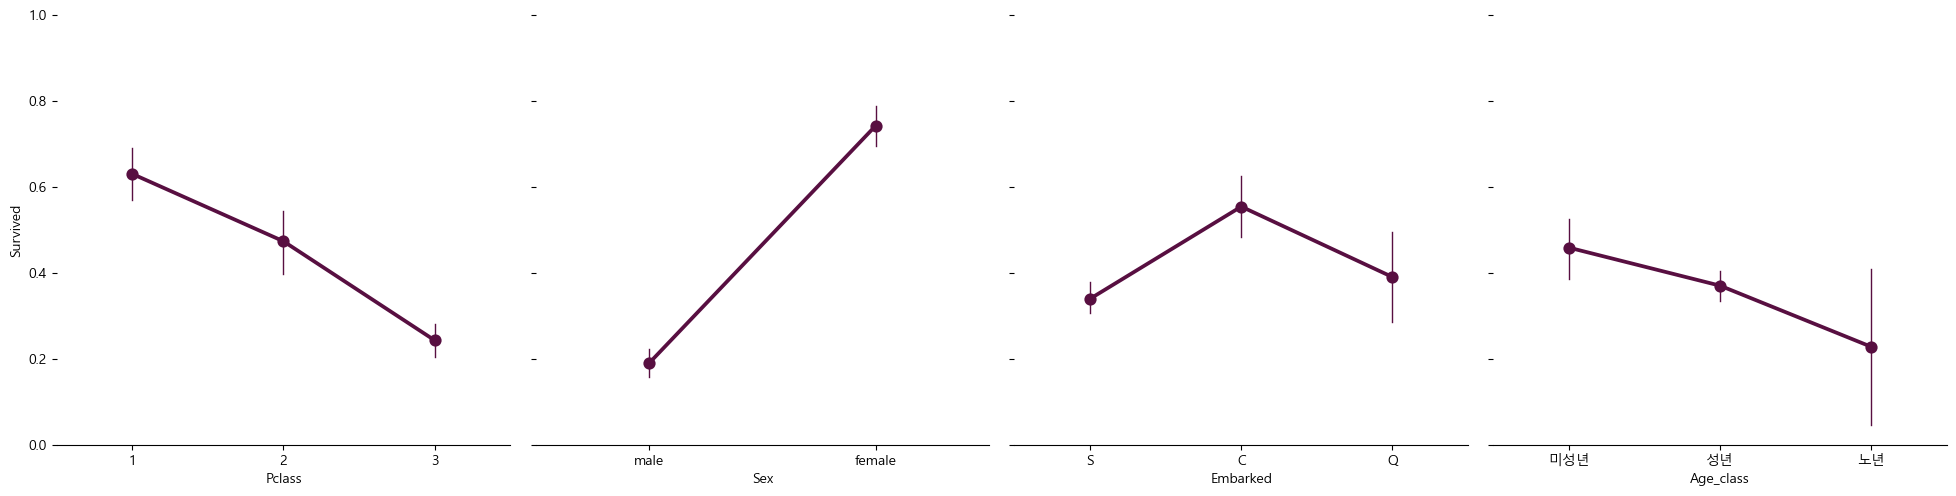

In [44]:
pg = sns.PairGrid(df, y_vars='Survived', x_vars=['Pclass', 'Sex', 'Embarked', 'Age_class'], height=5, aspect=1)
pg.map(sns.pointplot, err_kws={'linewidth':1}, color='xkcd:plum')
pg.set(ylim=(0, 1))
sns.despine(fig=pg.figure, left=True)

>pg.map에서 첫 인자는 차트의 종류, scale은 점의 크기를 errwidth는 세로선의 크기를, color는 차트의 색상을 지정한다. 

>set은 데이터를 설정하며 ylim은 y축의 범위를 의미한다.

>despine에서 fig는 출력할 데이터를 left는 왼쪽 좌표의 표기 유무를 의미하며 True이면 제거한다.

>위 차트는 각 상황에 따른 생존률을 표현한 것이며 각 점에 있는 세로직선은 신뢰구간을 의미한다.

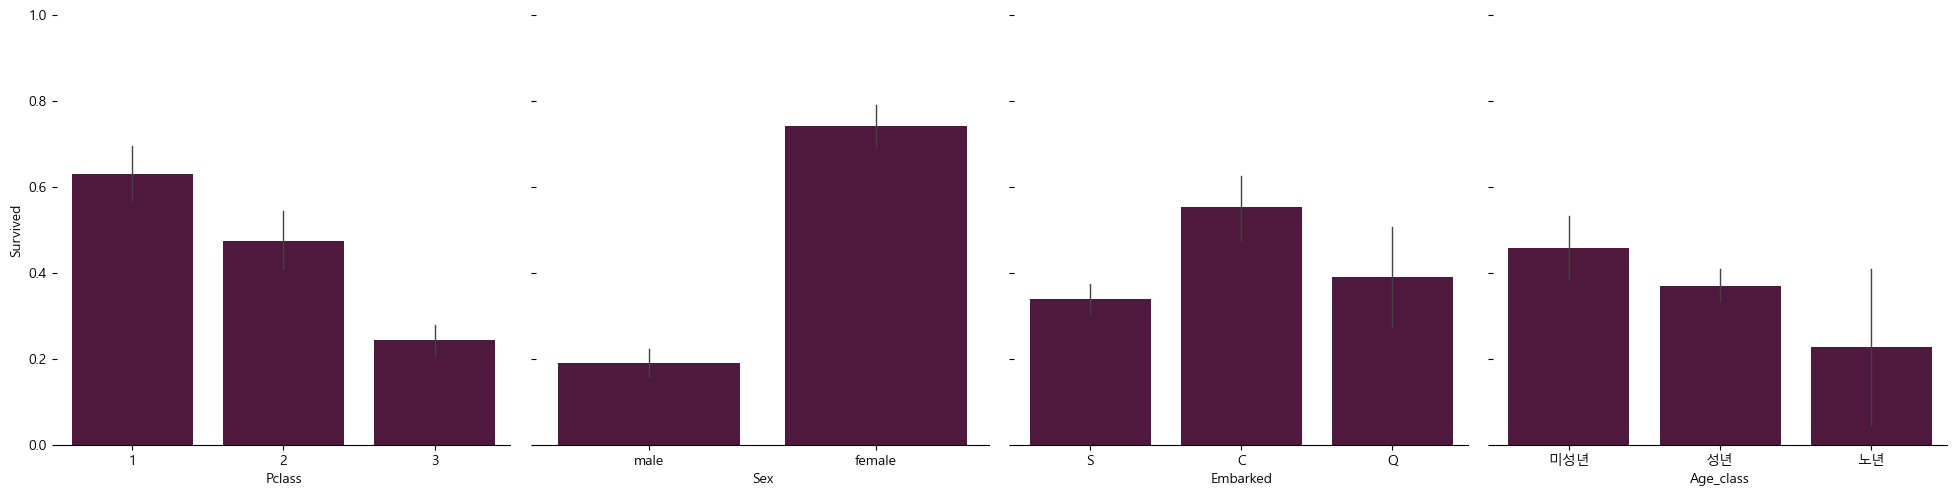

In [43]:
pg = sns.PairGrid(df, y_vars='Survived', x_vars=['Pclass', 'Sex', 'Embarked', 'Age_class'], height=5, aspect=1)
pg.map(sns.barplot, err_kws={'linewidth':1}, color='xkcd:plum')
pg.set(ylim=(0, 1))
sns.despine(fig=pg.figure, left=True)

>위와 같이 막대 그래프로 표현할 수도 있으며 점그래프와 마찬가지로 검정색 선은 신뢰구간을 의미한다.

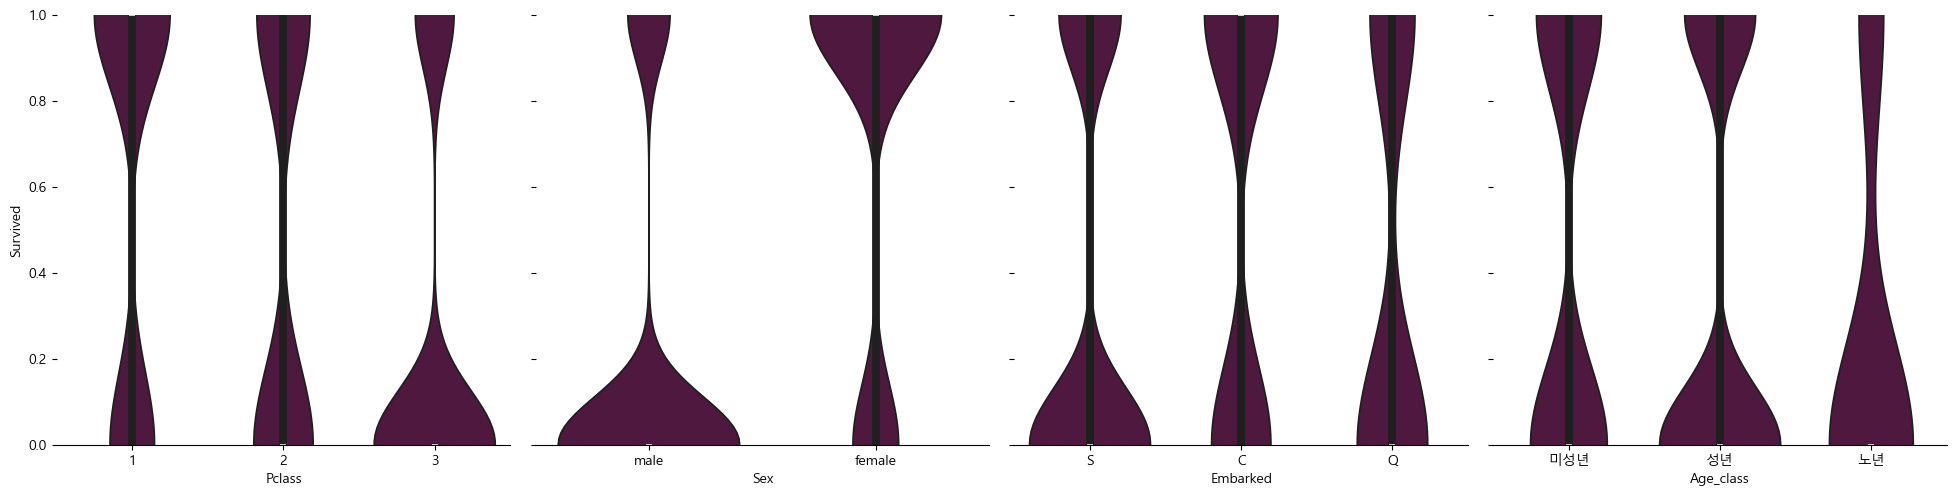

In [46]:
pg = sns.PairGrid(df, y_vars='Survived', x_vars=['Pclass', 'Sex', 'Embarked', 'Age_class'], height=5, aspect=1)
pg.map(sns.violinplot, color='xkcd:plum')
pg.set(ylim=(0, 1))
sns.despine(fig=pg.figure, left=True)

>바이올린 그래프는 크기가 큰 부분이 확률이 높은 것이다.

>객실 등급을 보면 1등석이 생존률이 높고 3등석이 생존률이 낮은 것을 볼 수 있다. 성별에서는 여성이 생존률이 높은 것을 볼 수 있다.

##3. 범주형 x 연속형
>범주형 x 연속형은 교차 분석 시 가장 많이 사용되는 분석 유형이다. 여기서는 다음 4가지에 대해 분석해 볼 예정이다.
* 나이에 따른 성별 생존률
* 가족에 따른 성별 생존률
* 요금에 따른 성별 생존률

###3.1 나이에 따른 성별 생존률

<Axes: xlabel='Age', ylabel='Count'>

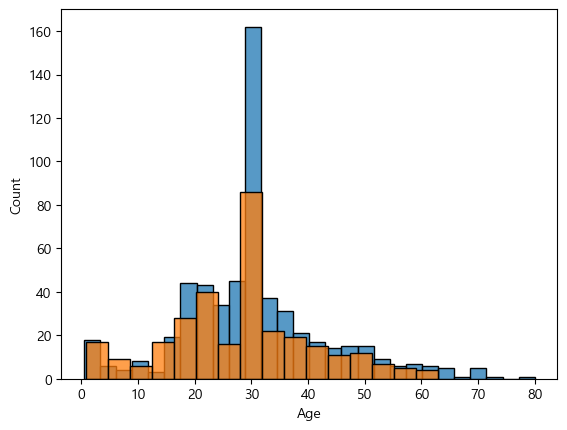

In [47]:
sns.histplot(df['Age'].loc[df['Sex']=='male'])
sns.histplot(df['Age'].loc[df['Sex']=='female'])

>각 나이별로 성별을 분리해서 구분해 봤다. displot을 이용하여 중첩된 데이터를 표현해 보았다. 대략 30대 구간이 가장 많이 분포되어 있는 것을 볼 수 있다.

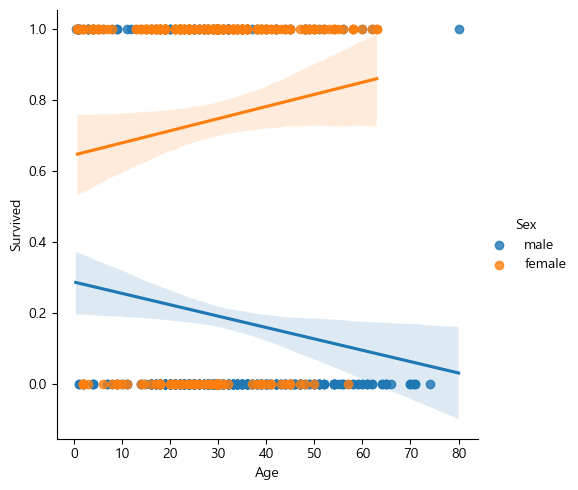

In [48]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=df)

>위의 차트로 알 수 있는 것은 나이가 많을 수록 여성의 생존률이 높아지는 것을 볼 수 있다.

### 3.2 가족에 따른 성별 생존률

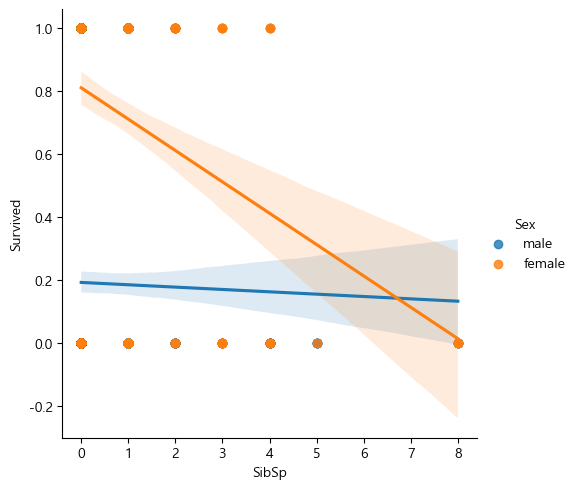

In [49]:
sns.lmplot(x='SibSp', y='Survived', hue='Sex', data=df)

>형제가 있는 경우 여자의 생존률은 감소하지만 남자는 큰 변화가 없었다.

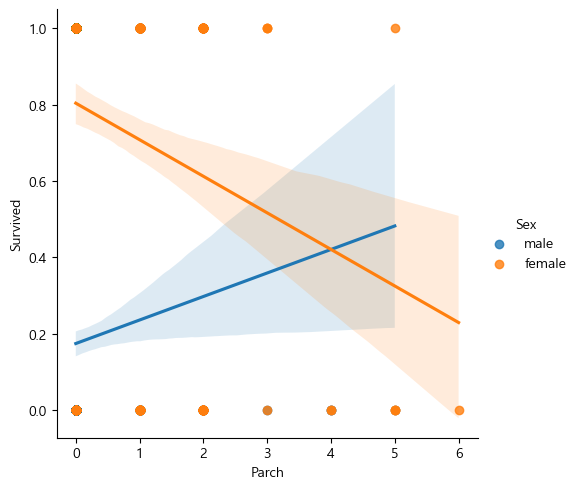

In [50]:
sns.lmplot(x='Parch', y='Survived', hue='Sex', data=df)

>하지만 부모 자식이 있는 경우 남자의 생존률이 올라갔다. 

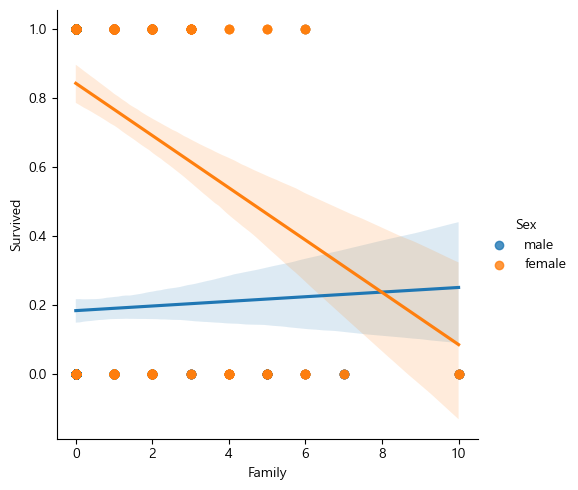

In [51]:
df['Family'] = df['SibSp'] + df['Parch']
sns.lmplot(x='Family', y='Survived', hue='Sex', data=df)

>위처럼 family라는 별도의 파생변수를 만들어 값을 확인할 수도 있다.

### 3.3 요금에 따른 성별 생존률

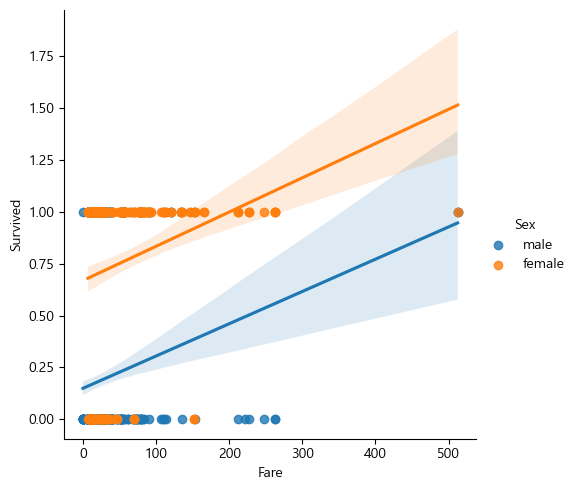

In [52]:
sns.lmplot(x='Fare', y='Survived', hue='Sex', data=df)

> 성별에 상관 없이 금액이 비쌀수록 생존률이 높다.

In [53]:
def bar_chart(feature, isStacked=True):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df_titanic = pd.DataFrame([survived, dead])
    df_titanic.index = ['Survived', 'Dead']
    df_titanic.plot(kind='bar', stacked=isStacked, figsize=(10, 5))

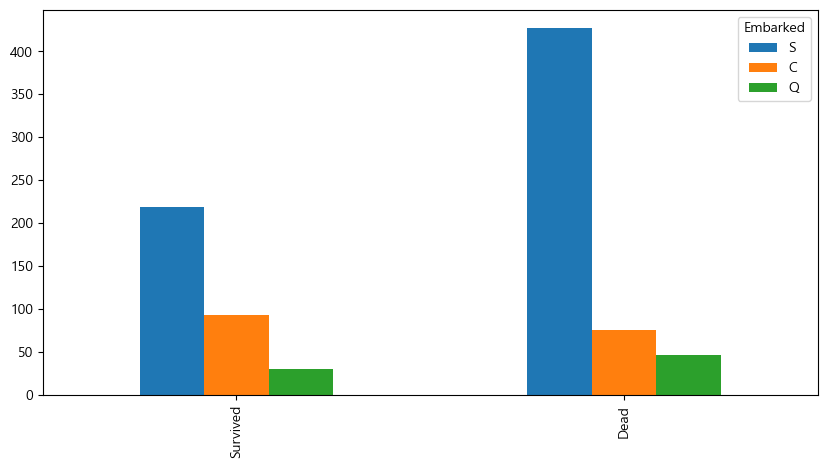

In [54]:
bar_chart('Embarked', False)

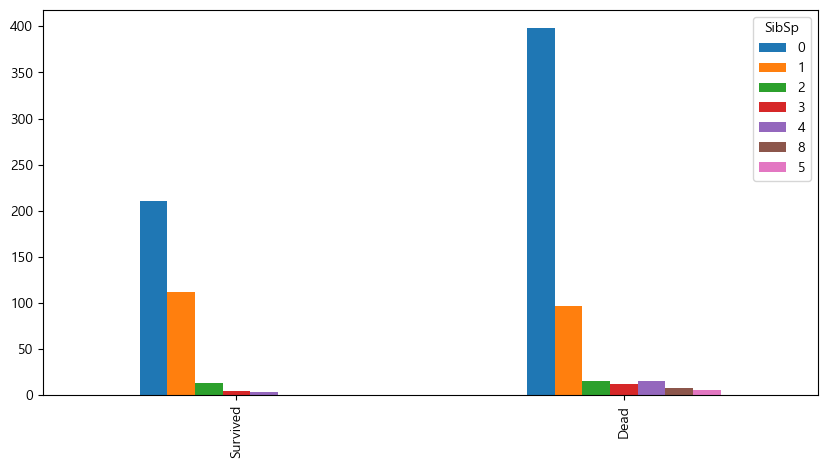

In [57]:
bar_chart('SibSp', False)

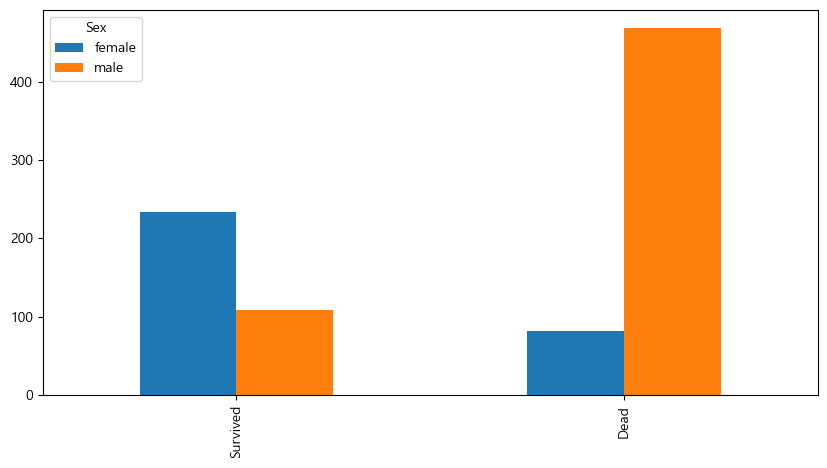

In [58]:
bar_chart('Sex', False)

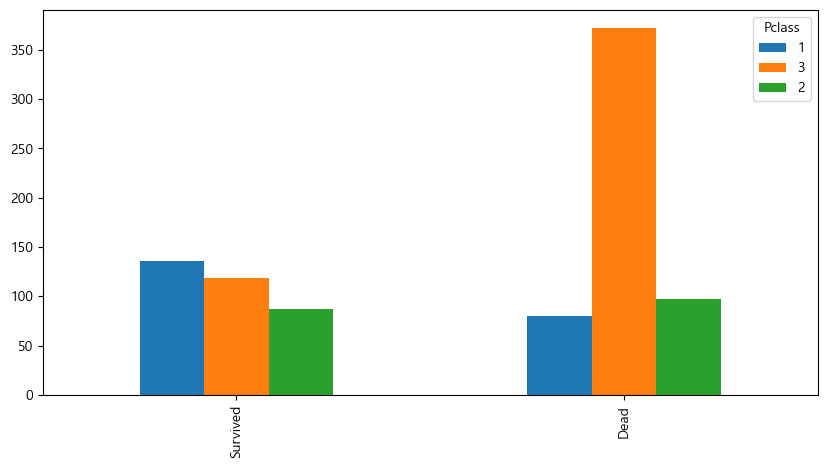

In [59]:
bar_chart('Pclass', False)

> 별도의 데이터만 추출하여 차트로 표현할 수 있다. 함수를 만들어 처리할 경우 인자의 기본값을 설정할 수 있으며 사용하지 않으면 기본값으로 적용되고 사용할 경우 값을 지정하여 사용하면 지정된 내용이 변경될 수 있다.

>위의 예제에서는 plot함수에 적용할 stacked를 기본값으로 적용했다. stacked는 막대 그래프를 포개서 적용할지 유무를 선택하는 것이며 statked가 true이면 막대그래프를 포개서 표현하게 된다.